<a href="https://colab.research.google.com/github/solozano0725/diplomadoMLNivel1/blob/main/DipMLsesion16.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<p><img alt="Colaboratory logo" height="140px" src="https://upload.wikimedia.org/wikipedia/commons/archive/f/fb/20161010213812%21Escudo-UdeA.svg" align="left" hspace="10px" vspace="0px"></p>

# **Diplomado de Análisis de datos y Machine Learning en Python**


El presente diplomado hace parte del centro de Big Data de la facultad de ciencias exactas y naturales (FCEN) de la Universidad de Antioquia.

## **Sesión 16**

## **Contenido**

- <a href="#reg"> Regularización</a><br>
  - <a href="#rid"> Regresión Ridge</a><br>
  - <a href="#las"> LASSO</a><br>
  - <a href="#ela"> Redes elásticas</a><br>
- <a href="#gra"> Gradiente descendente</a><br>






In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, learning_curve, GridSearchCV
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.pipeline import make_pipeline

In [ ]:
def nl_data(N, seed=1):
  """genera datos con una relacion no lineal"""
  np.random.seed(seed)
  X = np.random.rand(N) ** 2
  y = 10 - 1/(X + 0.1) + 2*np.random.rand(N)

  return np.c_[X], y

X, y = nl_data(40)


def polyreg(degree=2):
  """retorna un modelo de regresion polinomial"""
  return make_pipeline(PolynomialFeatures(degree),
                       StandardScaler(),
                       LinearRegression())
  
  
def plot_polyreg(X, y, degree, seed=42):
  """grafica un modelo de regresion polinomial"""

  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=seed)

  model = polyreg(degree).fit(X_train, y_train)

  x = np.c_[np.linspace(X.min(),X.max(),100)]
  y_pred = model.predict(x)

  print(f"train score: {model.score(X_train, y_train)}")
  print(f"validation score: {model.score(X_test, y_test)}")
  
  fig = plt.figure(figsize=(10,7))
  plt.scatter(X_train, y_train, label="train data")
  plt.scatter(X_test, y_test, label="validation data")
  plt.plot(x, y_pred, "r", label="model")
  plt.title(f"degree: {degree}")
  plt.legend();

<p><a name="reg"></a></p>

# **Regularización**

Vimos que el sobreajuste es un problema común en el ML, donde un modelo tiene un buen rendimiento sobre los datos de entrenamiento, pero no generaliza bien sobre los datos de validación. También caracterizamos este modelo como uno que tiene una alta varianza. Adicionalmente, un modelo también puede sufrir de sobreajuste o un alto sesgo. Identificamos el modelo óptimo como uno que está en un punto intermedio entre estos dos casos. 

Una forma de encontrar un buen balance entre el sesgo y la varianza es controlar la complejidad del modelo mediante la *regularización*

Consideremos el caso de un modelo muy complejo que sobreajuste los datos


train score: 0.9787426320330604
validation score: 0.7675284443296111


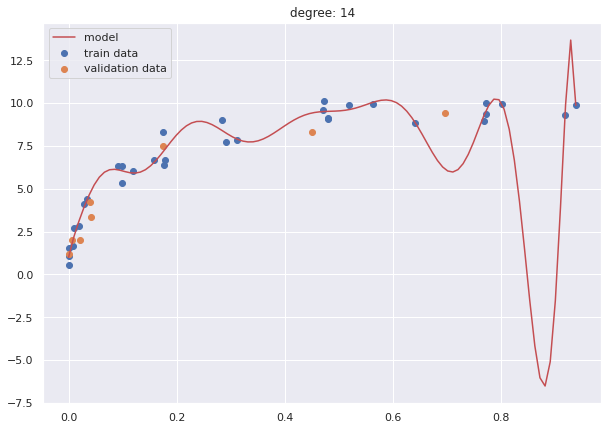

In [ ]:
plot_polyreg(X, y, 14)

visualicemos los coeficientes asociados a cada potencia:


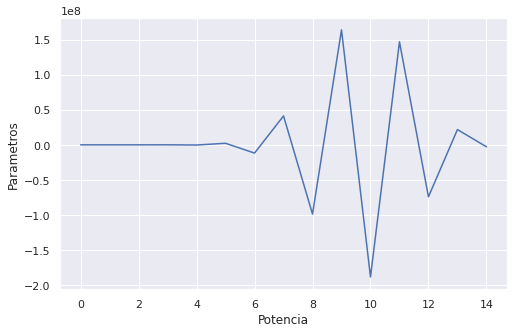

In [ ]:
model = polyreg(14).fit(X, y)

plt.figure(figsize=(8,5))
plt.plot(model["linearregression"].coef_)
plt.xlabel("Potencia")
plt.ylabel("Parametros");

Note que los coeficientes de las potencias adyacentes varían mucho. 

El concepto detrás de la regularización es el de penalizar valores extremos de los parámetros del modelo para reducir la complejidad del mismo, o en otras palabras, introducir información adicional para añadir un sesgo al modelo y de este modo disminuir su varianza. 

La regularización se puede introducir de varias formas:







<p><a name="rid"></a></p>

# **Regresión Ridge**

La forma más común de regularización es la llamada regularización $L_2$ $$L_2: \alpha \sum_{i=1}^m w_i^2$$ que penaliza la suma de los cuadrados de los parámetros del modelo. Al ser añadida a la función de costo de la regresión lineal simple define la *regresión Ridge*:

\begin{equation}
J(W) = \frac{1}{n}\sum_{i=1}^n (\hat y_i - y_i)^2 +    \frac{\alpha}{2} \sum_{i=1}^m w_i^2
\end{equation}

El hiperparámetro $ \alpha $ controla el nivel de regularización. En el límite $ \alpha \rightarrow 0 $, recuperamos el resultado de la regresión lineal estándar; en el límite $ \alpha \rightarrow \infty $, todos los parámetros del modelo serán suprimidos. El término de regularización solo debe agregarse a la función de costo durante el entrenamiento (el término de sesgo no se regulariza)

De esta forma se obliga al algoritmo de aprendizaje no solo a ajustar los datos sino también a mantener los parámetros del modelo lo más pequeños posible. 

Veamos cómo realizar la regresión Ridge con Sklearn. Es importante escalar los datos antes de realizar la regresión Ridge, ya que es sensible a la escala de las características de entrada (esto es cierto para la mayoría de los modelos regularizados)

In [ ]:
def polyreg(linear_estimator, degree=14):
  """retorna un modelo de regresion polinomial"""
  return make_pipeline(PolynomialFeatures(degree),
                       StandardScaler(),
                       linear_estimator)

def polyreg_scores(estimator, seed=42):
  """muestra los puntajes de un modelo de regresion polinomial"""
  X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                      test_size=0.2,
                                                      random_state=42)

  model = polyreg(estimator).fit(X_train, y_train)

  print(f"train score: {model.score(X_train, y_train)}")
  print(f"validation score: {model.score(X_test, y_test)}")              

In [ ]:
polyreg_scores(LinearRegression())

train score: 0.9787426320330604
validation score: 0.7675284443296111


In [ ]:
from sklearn.linear_model import Ridge

polyreg_scores(Ridge())

train score: 0.8459031484828612
validation score: 0.787163373111474


La puntuación del conjunto de entrenamiento con Ridge es más baja que la de LinearRegression, mientras que la puntuación del conjunto de validación con LinearRegression es más alta. Esto es consistente con lo que esperabamos del modelo de regresión regularizado: una disminución en el nivel de sobreajuste, lo que significa una mejor generalización del modelo.

El aumento de $\alpha$ obliga a los coeficientes a moverse más hacia el cero, lo que corresponde a disminuir la complejidad del modelo



In [ ]:
polyreg_scores(Ridge(alpha=10))

train score: 0.6648765026763686
validation score: 0.5238855821199


Note que el nivel de regularización fue muy alto por lo que se obtiene un modelo muy simple. Encontremos el valor óptimo de $\alpha$ 

In [ ]:
grid = GridSearchCV(polyreg(Ridge()), param_grid={"ridge__alpha": np.linspace(0.1,10,20)}, cv=5).fit(X, y)

grid.best_params_

{'ridge__alpha': 0.1}

In [ ]:
polyreg_scores(Ridge(alpha=0.1))

train score: 0.9174905151434221
validation score: 0.8955915133119885


Como vimos, un $\alpha$ más alto significa un modelo más restringido, por lo que esperamos que las entradas de `coef_` tengan una magnitud menor para un valor alto de $\alpha$ que para un valor bajo de $\alpha$:

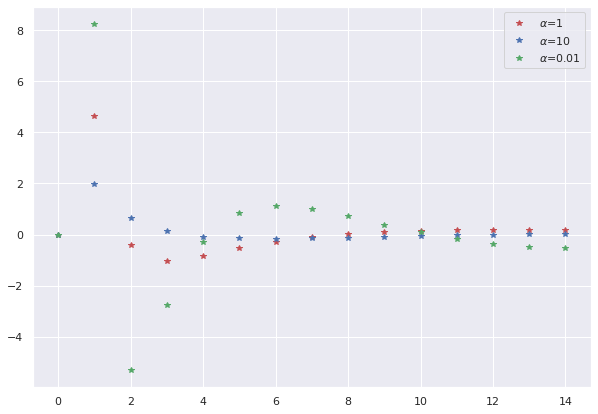

In [ ]:
ridge1 = polyreg(Ridge()).fit(X, y)
ridge10 = polyreg(Ridge(10)).fit(X, y)
ridge01 = polyreg(Ridge(0.1)).fit(X, y)

plt.figure(figsize=(10,7))

plt.plot(ridge1["ridge"].coef_, "r*", label=r"$\alpha$=1")
plt.plot(ridge10["ridge"].coef_, "b*", label=r"$\alpha$=10")
plt.plot(ridge01["ridge"].coef_, "g*", label=r"$\alpha$=0.01")
plt.legend();

Otra forma de entender la influencia de la regularización es fijar un valor de $\alpha$ y variar la cantidad de datos de entrenamiento. Veamos el caso de la regresión lineal


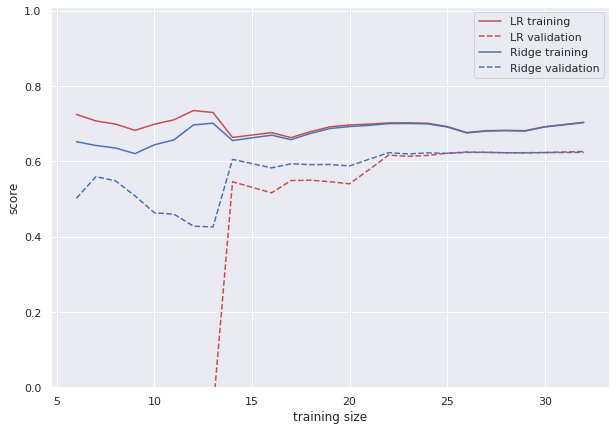

In [ ]:
sizes = np.linspace(0.2, 1, 25)

N, rtrain_score, rval_score = learning_curve(Ridge(0.1), X, y, cv=5, train_sizes=sizes)
_, train_score, val_score = learning_curve(LinearRegression(), X, y, cv=5, train_sizes=sizes)

fig = plt.figure(figsize=(10,7))
plt.plot(N, np.mean(train_score, axis=1), "r", label='LR training')
plt.plot(N, np.mean(val_score, axis=1), "r--", label='LR validation')
plt.plot(N, np.mean(rtrain_score, axis=1), "b", label='Ridge training')
plt.plot(N, np.mean(rval_score, axis=1), "b--", label='Ridge validation')
plt.ylim(0, 1.01)
plt.xlabel('training size')
plt.ylabel('score')
plt.legend();

Debido a que el modelo Ridge está regularizado, el puntaje de entrenamiento es más bajo que el puntaje de entrenamiento para la regresión lineal. Sin embargo, el puntaje de validación para Ridge es mejor, particularmente para pequeños subconjuntos de datos (Para menos de ~ 15, la regresión lineal no puede aprender nada). A medida que el modelo dispone de más y más datos, ambos modelos mejoran y, al final, la regresión lineal alcanza a Ridge. La lección aquí es que con suficientes datos de entrenamiento, la regularización se vuelve menos importante y, con suficientes datos, la regresión lineal y Ridge tendrán el mismo rendimiento.

Ahora, para el caso polinomial:


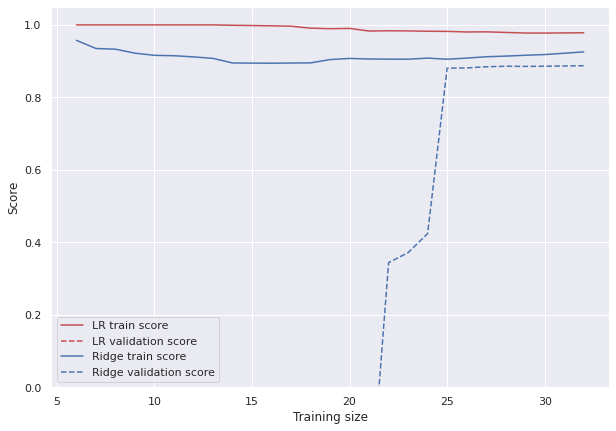

In [ ]:
sizes = np.linspace(0.2, 1, 25)

N, rtrain_score, rval_score = learning_curve(polyreg(Ridge(0.1)), X, y, cv=5, train_sizes=sizes)
_, train_score, val_score = learning_curve(polyreg(LinearRegression()), X, y, cv=5, train_sizes=sizes)

fig = plt.figure(figsize=(10,7))
plt.plot(N, np.mean(train_score, axis=1), "r", label="LR train score")
plt.plot(N, np.mean(val_score, axis=1), "r--", label="LR validation score")
plt.plot(N, np.mean(rtrain_score, axis=1), "b", label="Ridge train score")
plt.plot(N, np.mean(rval_score, axis=1), "b--", label="Ridge validation score")
plt.ylim(0, 1.05)
plt.xlabel("Training size")
plt.ylabel("Score")
plt.legend();

Si el modelo está funcionando en un punto óptimo, añadir regularización no es la mejor idea, ya que disminuirá el rendimiento del modelo:

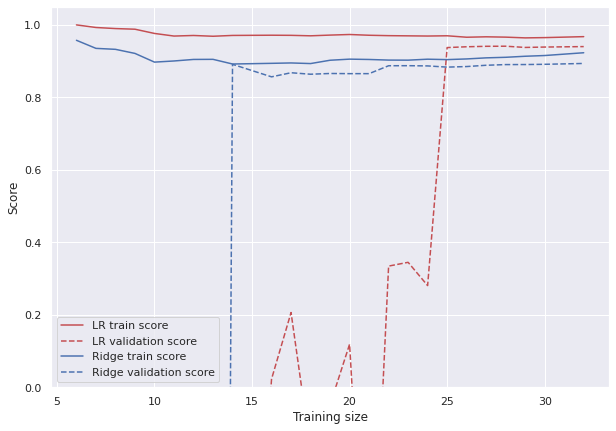

In [ ]:
sizes = np.linspace(0.2, 1, 25)

N, rtrain_score, rval_score = learning_curve(polyreg(Ridge(0.1), 5), X, y, cv=5, train_sizes=sizes)
_, train_score, val_score = learning_curve(polyreg(LinearRegression(), 5), X, y, cv=5, train_sizes=sizes)

fig = plt.figure(figsize=(10,7))
plt.plot(N, np.mean(train_score, axis=1), "r", label="LR train score")
plt.plot(N, np.mean(val_score, axis=1), "r--", label="LR validation score")
plt.plot(N, np.mean(rtrain_score, axis=1), "b", label="Ridge train score")
plt.plot(N, np.mean(rval_score, axis=1), "b--", label="Ridge validation score")
plt.ylim(0, 1.05)
plt.xlabel("Training size")
plt.ylabel("Score")
plt.legend();

<p><a name="las"></a></p>

# **LASSO**

Otro tipo de regularización muy común es la regularización $L_1$ $$L_1 : \; \alpha \sum_{i=1}^m|w_i|$$ que penaliza la suma de los valores absolutos de los parámetros de la regresión. Al ser añadida a la función de costo de la regresión lineal simple define un modelo disperso conocido como LASSO (Least Absolute Shrinkage and Selection Operator)

\begin{equation}
J(W) = \frac{1}{n} \sum_{i=1}^n (\hat y_i - y_i)^2 +  \alpha \sum_{i=1}^m |w_i|
\end{equation}

Al igual que con la regresión ridge, el uso de LASSO también restringe los coeficientes para que sean cercanos a cero, permitiendo que algunos coeficientes sean nulos, por lo que LASSO puede verse como una forma de selección automática de características que es muy útil para manejar el "problema" de la multicolinealidad (alta correlación entre las características

In [ ]:
from sklearn.linear_model import Lasso

polyreg_scores(Lasso())

train score: 0.5632792377488706
validation score: 0.3314446423983448


Como podemos ver, Lasso lo hace bastante mal, tanto en el entrenamiento como en el conjunto de validación. Esto indica que estamos subajustando los datos, ya que se usó una cantidad pequeña de características



In [ ]:
lasso = polyreg(Lasso()).fit(X, y)

lasso["lasso"].coef_

array([ 0.        ,  1.60154436,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        , -0.        , -0.        , -0.        ])

De manera similar a Ridge, Lasso también tiene un parámetro de regularización, que controla la fuerza con la que los coeficientes se hacen cero.

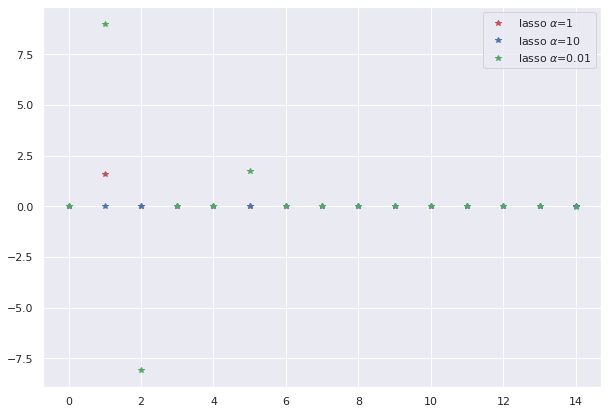

In [ ]:
lasso10 = polyreg(Lasso(alpha=10)).fit(X, y)
lasso01 = polyreg(Lasso(alpha=0.01)).fit(X, y)

plt.figure(figsize=(10,7))

plt.plot(lasso["lasso"].coef_, "r*", label=r"lasso $\alpha$=1")
plt.plot(lasso10["lasso"].coef_, "b*", label=r"lasso $\alpha$=10")
plt.plot(lasso01["lasso"].coef_, "g*", label=r"lasso $\alpha$=0.01")
plt.legend();

En la práctica, la regresión ridge suele ser la primera opción entre estos dos modelos. Sin embargo, si deseamos tener un modelo que sea fácil de interpretar, LASSO será el modelo a utilizar, ya que seleccionará solo un subconjunto de las características más importantes para la predicción.


<p><a name="ela"></a></p>

# **Redes Elásticas**

scikit-learn también proporciona la clase `ElasticNet`, que combina las penalizaciones de Lasso y Ridge. El término de regularización es una combinación simple de los términos de regularización de Ridge y Lasso, donde podemos controlar la proporción de mezcla $0\leq r \leq 1$

$$J(W) = \frac{1}{n} \sum_{i=1}^n (\hat y_i - y_i)^2 +\alpha r \sum_{i=1}^m |w_i| + \frac{\alpha(1-r)}{2}\sum_{i=1}^m w_i^2 $$

In [ ]:
from sklearn.linear_model import ElasticNet

param_grid={"elasticnet__alpha":np.linspace(0.1,10,20),
            "elasticnet__l1_ratio":np.linspace(0.1,1,20)}

grid = GridSearchCV(polyreg(ElasticNet()), param_grid, cv=5).fit(X, y)

grid.best_params_

{'elasticnet__alpha': 0.1, 'elasticnet__l1_ratio': 1.0}

<p><a name="gra"></a></p>

# **Gradiente descendente**

Como ya hemos visto, uno de los ingredientes principales en los algoritmos de aprendizaje es definir una función de costo a optimizar durante el proceso de entrenamiento, por ejemplo

\begin{equation}
J(W) = \frac{1}{n} \sum_{i=1}^n (\hat y_i - y_i)^2 
\end{equation}

Una propiedad de esta función es que es convexa, por lo que se puede utilizar un algoritmo de optimización muy poderoso conocido como *gradiente descendente* para encontrar los parámetros que minimizan la función de costo.

El gradiente es una palabra elegante para referirnos a la derivada o tasa de cambio de una función. Básicamente es un vector que apunta en la dirección de mayor aumento de una función y que es cero en un máximo local o mínimo local.

Concretamente, el algoritmo comienza eligiendo un vector de parámetros $W$ con valores aleatorios, y luego se mejora gradualmente, dando un pequeño paso a la vez, intentando disminuir la función de costo en cada paso hasta que el algoritmo converja al mínimo.


<p><img alt="Colaboratory logo" height="300px" src="https://i.imgur.com/i3aX3oL.png" align="left" hspace="10px" vspace="0px"></p>

Un parámetro importante es el tamaño de los pasos, determinado por el hiperparámetro $\eta$, conocido como *tasa de aprendizaje*. Si este es muy pequeño, el algoritmo tomará mucho tiempo en converger al mínimo o si es muy grande podríamos incluso alejarnos del mínimo. Este valor puede ser constante o variar paso a paso. 



<p><img alt="Colaboratory logo" height="250px" src="https://i.imgur.com/Zd3iuqE.png" align="left" hspace="10px" vspace="0px"></p>

No todas las funciones de costo se ven como "bowls" normales. Pueden haber agujeros, crestas, mesetas y todo tipo de terrenos irregulares, lo que dificulta la convergencia al mínimo.

El algoritmo de gradiente descendente es otro que se beneficia del escalamiento de las características, ya que el algoritmo debe realizar menos pasos para llegar al mínimo cuando las características tienen la misma escala.






Cada paso en el algoritmo está dado por:

\begin{equation}
W^{next} = W - \eta\; \nabla J(W)
\end{equation}

donde 

$$\nabla J(W)  = \frac{2}{n} X^T\cdot (X \cdot W - y)$$

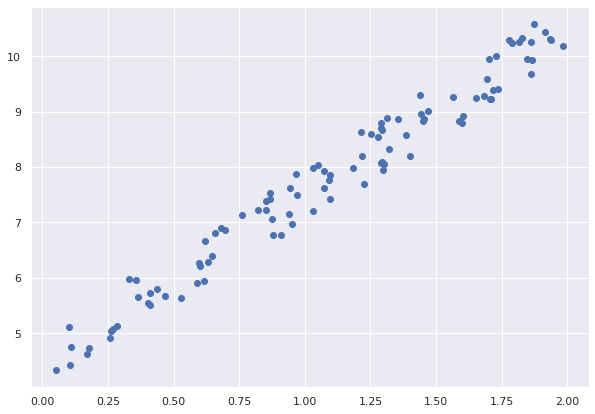

In [ ]:
# numero de instancias
m = 100

# datos lineales
X = 2*np.random.rand(m, 1)
y = 4 + 3*X + np.random.rand(m, 1)

plt.figure(figsize=(10,7))
plt.scatter(X, y);

In [ ]:
# BATCH GRADIENT DESCENT

# taza de aprendizaje
eta = 0.1

# numero de iteraciones
n_iter = 1000

# matriz de caracteristicas con el
# termino de sesgo
X_b = np.c_[np.ones((m, 1)), X]

# valor inicial del parametro
w = np.random.rand(2, 1)

for i in range(n_iter):
  gradient = 2/m * X_b.T @ (X_b @ w - y)
  w = w - eta*gradient

w

array([[4.43809096],
       [3.04971397]])

Note que en cada iteración se utiliza todo el conjunto de entrenamiento, lo cual puede ser muy costoso computacionalmente si el conjunto de datos es muy grande (*batch gradient descent*).

Una forma alternativa es el gradiente descendente estocástico (SGD) donde, en vez de utilizar todas las instancias en cada paso, se elige una instancia aleatoria del conjunto de entrenamiento en cada paso y se calcula el gradiente basándose solo en esa única instancia. Esto hace que el algoritmo sea mucho más rápido, ya que tiene muy pocos datos para manipular en cada iteración. También permite entrenar en grandes conjuntos de entrenamiento, ya que solo una instancia debe estar en memoria en cada iteración.

Sin embargo, por usar una única instancia en cada iteración, este algoritmo es menos estable o más "ruidoso" lo que podría ser una ventaja ya que permitiría salir de mínimos locales que no corresponden con el mínimo real, aunque podría ser malo ya que el algoritmo podría no estabilizarse en el mínimo global. Una solución a esto es gradualmente reducir la taza de aprendizaje: Los pasos en principio son grandes, lo que ayuda a avanzar rápidamente y salir de mínimos locales, y luego empiezan a ser cada vez más pequeños de tal manera que el algoritmo se estabilice en el mínimo. La función que determina la taza de aprendizaje en cada iteración se conoce como *learning rate schedule*.

Adicionalmente, para obtener resultados satisfactorios con el SGD, los datos de entrenamiento se deben permutar en cada iteración y seleccionarse de forma aleatoria en cada paso.

Por convención iteramos por rondas de $n$ iteraciones, donde cada ronda se conoce como una *época*






In [ ]:
# STOCASTIC GRADIENT DESCENT

# numero de epocas (rondas de iteraciones)
epochs = 50

# valor inicial del parametro
w = np.random.randn(2, 1)

def learning_rate_schedule(iter, a=50):
  """
  modifica la taza de aprendizaje en funcion
  del numero de iteraciones iter y un parametro
  adicional a
  """
  return 1/(iter + a)

for epoch in range(epochs):
  for i in range(m):
    # seleccion aleatoria de una instancia
    index = np.random.randint(m)
    xi = X_b[index:index+1]
    yi = y[index:index+1]

    # calculo del gradiente y actualizacion
    # de la taza de aprendizaje y el parametro
    gradient = 2 * xi.T @ (xi @ w - yi)
    eta = learning_rate_schedule(epoch*i)
    w = w - eta*gradient

w

array([[4.38300754],
       [3.07973729]])

Mientras que el BGD iteró 1000 veces en todo el conjunto de entrenamiento, esta implementación pasa por el conjunto de entrenamiento solo 50 veces y llega a una solución bastante buena. 

Podemos implementar directamente el SGD desde Sklearn con la función `SGDRegressor`


In [ ]:
from sklearn.linear_model import SGDRegressor

param_grid={"learning_rate":["constant","invscaling","constant","adaptive"]}

grid = GridSearchCV(SGDRegressor(), param_grid, cv=5).fit(X, y.flatten())

model = grid.best_estimator_

In [ ]:
model.intercept_

array([4.38801767])

In [ ]:
model.coef_

array([3.09732037])